# <center> Network Descriptive Statistics_II </center>

## 2. Networks from social media platforms<br>
- Large social media platforms are important sources of social networks.
- Social networks play an important in collective action and information diffusion. 
- Here we use the **NETWORKX** to do SNA. https://networkx.org/documentation/stable/reference/introduction.html

### 2.1. Extract retweet and mention networks from Twitter data<br>
* Retweet edgelist 
    - Can be directly obtained from Twitter API as a variable <font color='blue'>"retweeted_status.user.screen_name"</font>. Remeber when we scrape tweepy we can check if this is a retweet or not. 
    - Or can be extracted from the **truncated text** using regular expression.
    - NOTE: Twitter data only contains the original tweet in retweet relations, meaning we can't retrive the retweet chain. 
* Mention edgelist
    - Can be extracted from the **full text** using regular expression.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Fortune 1000 U.S. companies' tweets in 2020/3
# Filtered the keywords list consisitent with this dataset https://github.com/echen102/COVID-19-TweetIDs

df=pd.read_csv('business_tweets.csv',encoding= 'unicode_escape')
df.info()
len(set(df.screen_name))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         5674 non-null   float64
 1   user_id          5674 non-null   object 
 2   screen_name      5674 non-null   object 
 3   created_at       5674 non-null   object 
 4   favorite_count   5674 non-null   int64  
 5   retweet_count    5674 non-null   int64  
 6   text             5674 non-null   object 
 7   truncated_tweet  5658 non-null   object 
 8   retweet          5658 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 399.1+ KB


558

,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet
0,1.230000e+18,2904112697,MMC_Global,3/1/20 20:00,3,1,How will the #coronavirus impact #business and...,How will the #coronavirus impact #business and...,original
1,1.230000e+18,120578352,CatalentPharma,3/1/20 21:50,1,2,Join us at Gene Therapy for Rare Disorders in ...,Join us at Gene Therapy for Rare Disorders in ...,original
2,1.230000e+18,151998296,MoodysInvSvc,3/2/20 9:53,1,1,The #coronavirus outbreak will disrupt automot...,The #coronavirus outbreak will disrupt automot...,original
3,1.230000e+18,337847812,FTI_Global,3/2/20 10:00,1,1,Read why John Beck thinks central banks will ¡...,Read why John Beck thinks central banks will ¡...,original
4,1.230000e+18,2904112697,MMC_Global,3/2/20 11:00,6,1,To effectively prepare and respond to the thre...,To effectively prepare and respond to the thre...,original


In [3]:
# subset retweets
rt_df=df[df.retweet=="retweet"]
rt_df.head()


,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet
5,1.230000e+18,48402711,unisyscorp,3/2/20 11:31,0,1,"Niranjan Navaratnarajah MBA, Cargo Industry Di...",RT @SurecomMedia09: Niranjan Navaratnarajah MB...,retweet
7,1.230000e+18,15749983,Cisco,3/2/20 14:15,0,218,Due to the unprecedented and global increase i...,RT @CiscoCollab: Due to the unprecedented and ...,retweet
8,1.230000e+18,2904112697,MMC_Global,3/2/20 14:29,0,3,#Webcast replay now available: Learn how to pr...,RT @MarshGlobal: #Webcast replay now available...,retweet
9,1.230000e+18,2904112697,MMC_Global,3/2/20 14:30,0,1,How will the #coronavirus impact #business and...,RT @GuyCarpenter: How will the #coronavirus im...,retweet
14,1.230000e+18,48402711,unisyscorp,3/2/20 16:28,0,1,A wrap up of @RSAConference #2020: from #Coron...,RT @InformationAge: A wrap up of @RSAConferenc...,retweet


In [4]:
# extract retweeted accounts 
twitter_username_re = re.compile(r'RT @([A-Za-z0-9._-]+)')
# search in truncated text
# you can also retrieve the retweeted accounts directly from API
retweeted=[re.findall(twitter_username_re,x)[0].lower() for x in rt_df.truncated_tweet]
rt_df=rt_df.copy()
rt_df["retweeted"]=retweeted
rt_df.head()

,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet,retweeted
5,1.230000e+18,48402711,unisyscorp,3/2/20 11:31,0,1,"Niranjan Navaratnarajah MBA, Cargo Industry Di...",RT @SurecomMedia09: Niranjan Navaratnarajah MB...,retweet,surecommedia09
7,1.230000e+18,15749983,Cisco,3/2/20 14:15,0,218,Due to the unprecedented and global increase i...,RT @CiscoCollab: Due to the unprecedented and ...,retweet,ciscocollab
8,1.230000e+18,2904112697,MMC_Global,3/2/20 14:29,0,3,#Webcast replay now available: Learn how to pr...,RT @MarshGlobal: #Webcast replay now available...,retweet,marshglobal
9,1.230000e+18,2904112697,MMC_Global,3/2/20 14:30,0,1,How will the #coronavirus impact #business and...,RT @GuyCarpenter: How will the #coronavirus im...,retweet,guycarpenter
14,1.230000e+18,48402711,unisyscorp,3/2/20 16:28,0,1,A wrap up of @RSAConference #2020: from #Coron...,RT @InformationAge: A wrap up of @RSAConferenc...,retweet,informationage


In [5]:
# read in covariates info, which will be the sample of organizations that we focus on.
# this file is about types of organizations
# large NGOs, government organizations
cov=pd.read_csv('covariates.csv',encoding= 'unicode_escape')
cov.head()

,state,screen_name,type
0,AR,clintonfdn,ngo
1,AZ,stmarysfoodbank,ngo
2,AZ,magellanhealth,business
3,CA,atvi_ab,business
4,CA,vmcfoundation,ngo


In [6]:
# we filter retweeted accounts and find those we focus on
# then we will get an edgelist of companies 
# if you want to see everyone those companies retweeted, then you need to code those accounts.

rt_el=rt_df[rt_df.retweeted.isin(cov.screen_name)] 
rt_el=rt_el.iloc[:,[2,9]]
rt_el.screen_name=[x.lower() for x in rt_el.screen_name]
len(rt_el)
rt_el

98

,screen_name,retweeted
42,molinahealth,wadepthealth
427,dte_energy,energy
449,dte_energy,epa
458,unitedhealthgrp,cdcgov
559,zionsbank,sbagov
...,...,...
5380,ugi_utilities,pahealthdept
5381,ugi_utilities,pahealthdept
5455,kelloggcompany,feedingamerica
5493,microsoft,cdcfound


In [7]:
# Let's build a network!

# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges 
G.add_edges_from(rt_el.to_numpy().tolist())


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The retweet network of Fortune companies')

(-0.898775493916383,
 1.1804266306436382,
 -0.8577917278645707,
 1.0067648367954682)

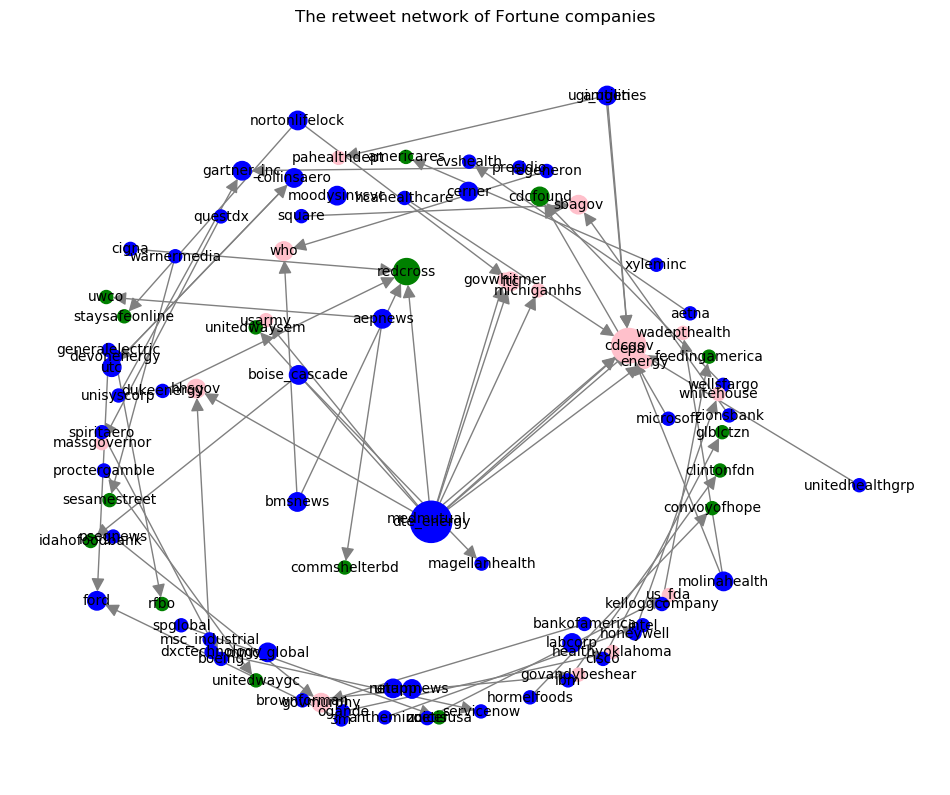

In [8]:
# Take a look
figure(figsize=(12, 10), dpi=100)

# node size proportional to degree
node_size= [x * 8000 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.kamada_kawai_layout(G)


# edge color
edge_color="grey"

# make arrows more obvious
arrowsize=20

# make a list of colors to differentiate different types of orgs
color=[cov.loc[cov.screen_name==i, "type"].iloc[0] for i in G.nodes]
replacements = {
    "business": "blue",
    "ngo": "green",
    "gov": "pink",
}
node_color = [replacements.get(x, x) for x in color]


nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=True,
                                  font_size=10)
plt.title('The retweet network of Fortune companies')
plt.axis("off") 
plt.show()

# what interpretations can you draw from the graph?

In [9]:
# Which companies sent more ties?
x=nx.out_degree_centrality(G)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

{'dte_energy': 0.1098901098901099,
 'molinahealth': 0.02197802197802198,
 'ugi_utilities': 0.02197802197802198,
 'nortonlifelock': 0.02197802197802198,
 'aepnews': 0.02197802197802198,
 'boise_cascade': 0.02197802197802198,
 'bmsnews': 0.02197802197802198,
 'unitedhealthgrp': 0.01098901098901099,
 'zionsbank': 0.01098901098901099,
 'amgen': 0.01098901098901099,
 'wellsfargo': 0.01098901098901099,
 'aetna': 0.01098901098901099,
 'xyleminc': 0.01098901098901099,
 'cerner': 0.01098901098901099,
 'regeneron': 0.01098901098901099,
 'hcahealthcare': 0.01098901098901099,
 'presidio': 0.01098901098901099,
 'moodysinvsvc': 0.01098901098901099,
 'square': 0.01098901098901099,
 'cigna': 0.01098901098901099,
 'collinsaero': 0.01098901098901099,
 'utc': 0.01098901098901099,
 'questdx': 0.01098901098901099,
 'unisyscorp': 0.01098901098901099,
 'warnermedia': 0.01098901098901099,
 'dukeenergy': 0.01098901098901099,
 'devonenergy': 0.01098901098901099,
 'generalelectric': 0.01098901098901099,
 'spirit

In [10]:
# Which organizations have the largest indegree centrality?
x=nx.in_degree_centrality(G)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

{'cdcgov': 0.07692307692307693,
 'redcross': 0.04395604395604396,
 'sbagov': 0.02197802197802198,
 'cdcfound': 0.02197802197802198,
 'who': 0.02197802197802198,
 'ftc': 0.02197802197802198,
 'gartner_inc': 0.02197802197802198,
 'hhsgov': 0.02197802197802198,
 'ford': 0.02197802197802198,
 'govmurphy': 0.02197802197802198,
 'wadepthealth': 0.01098901098901099,
 'energy': 0.01098901098901099,
 'epa': 0.01098901098901099,
 'michiganhhs': 0.01098901098901099,
 'cvshealth': 0.01098901098901099,
 'govwhitmer': 0.01098901098901099,
 'americares': 0.01098901098901099,
 'pahealthdept': 0.01098901098901099,
 'cerner': 0.01098901098901099,
 'moodysinvsvc': 0.01098901098901099,
 'staysafeonline': 0.01098901098901099,
 'uwco': 0.01098901098901099,
 'collinsaero': 0.01098901098901099,
 'utc': 0.01098901098901099,
 'usarmy': 0.01098901098901099,
 'unitedwaysem': 0.01098901098901099,
 'massgovernor': 0.01098901098901099,
 'sesamestreet': 0.01098901098901099,
 'idahofoodbank': 0.01098901098901099,
 'rf

In [11]:
# Can you propose any research question?

# Eg: Which type of organizations are more likely to be retweeted from business?
cent=pd.DataFrame(x.items(),columns=['screen_name', 'indegree']) 
cent=pd.merge(cent, cov, on='screen_name',how="left")
cent.head()

# can test with a simple regression
import statsmodels.formula.api as smf
model = smf.ols(formula = 'indegree ~  C(type)+C(state)', \
                   data = cent).fit();
model.summary()

# NOTE!!! A more valid way to test if the effects of covariates on receiving and sending ties
# SHOULD be Exponential Random Graph Models. 

,screen_name,indegree,state,type
0,molinahealth,0.000000,CA,business
1,wadepthealth,0.010989,WA,gov
2,dte_energy,0.000000,MI,business
3,energy,0.010989,national,gov
4,epa,0.010989,national,gov


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               indegree   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1.807
Date:                Sun, 05 Feb 2023   Prob (F-statistic):             0.0254
Time:                        13:00:10   Log-Likelihood:                 315.41
No. Observations:                  92   AIC:                            -568.8
Df Residuals:                      61   BIC:                            -490.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0035      0.010      0.344      0.732      -0.017       0.024
C(type)[T.gov]           0.0109      0.004      2.522      0.014       0.002       0.019
C(type)[T.ngo]           0.0074      0.004      2.041      0.046       0.000       0.015
C(state)[T.AZ]           0.0074      0.014      0.528      0.600      -0.021       0.036
C(state)[T.CA]           0.0001      0.011      0.011      0.991      -0.021       0.022
C(state)[T.CT]           0.0038      0.011      0.343      0.733      -0.018       0.026
C(state)[T.DC]           0.0165      0.012      1.396      0.168      -0.007       0.040
C(state)[T.GA]           0.0110      0.014      0.806      0.423      -0.016       0.038
C(state)[T.IA]           0.0074      0.014      0.528      0.600      -0.021       0.036
C(state)[T.ID]          -0.0018      0.012     -0.148      0.883      -0.026       0.022
C(state)[T.IL]           0.0037      0.012      0.312      0.756      -0.020       0.028
C(state)[T.IN]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.KS]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.KY]          -0.0035      0.012     -0.279      0.781      -0.028       0.021
C(state)[T.MA]          -0.0035      0.012     -0.279      0.781      -0.028       0.021
C(state)[T.MI]           0.0008      0.011      0.069      0.945      -0.021       0.023
C(state)[T.MN]          -0.0035      0.012     -0.302      0.763      -0.027       0.020
C(state)[T.MO]           0.0037      0.012      0.312      0.756      -0.020       0.028
C(state)[T.NC]           0.0001      0.012      0.010      0.992      -0.023       0.024
C(state)[T.NJ]          -0.0013      0.011     -0.118      0.906      -0.024       0.021
C(state)[T.NY]          -0.0011      0.010     -0.107      0.915      -0.022       0.020
C(state)[T.OH]          -0.0018      0.011     -0.168      0.867      -0.023       0.019
C(state)[T.OK]          -0.0026      0.011     -0.236      0.814      -0.025       0.020
C(state)[T.PA]          -0.0035      0.012     -0.298      0.767      -0.027       0.020
C(state)[T.RI]           0.0074      0.014      0.528      0.600      -0.021       0.036
C(state)[T.TN]           0.0020      0.012      0.158      0.875      -0.023       0.027
C(state)[T.UN]        4.452e-17      0.014   3.27e-15      1.000      -0.027       0.027
C(state)[T.UT]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.VA]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.WA]          -0.0035      0.012     -0.279      0.781      -0.028       0.021
C(state)[T.national]     0.0076      0.011      0.661      0.511      -0.015       0.030
=========================================================

In [12]:
# Now let's turn to mention network
# Note: in one tweet, there could be multiple mentioned accounts
# How to convert it to an edgelist?

men_df=df[df.retweet!="retweet"]
men_df.head()
men_df['text'][0]

# extract mentioned accounts 
twitter_username_men = re.compile(r'@([A-Za-z0-9._-]+)')
# search in full text
mentioned=[re.findall(twitter_username_men,x) for x in men_df.text]
men_df=men_df.copy()
men_df['mentioned']=np.array(mentioned,dtype="object")
men_df=men_df.iloc[:,[2,9]]
men_df.head()

,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet
0,1.230000e+18,2904112697,MMC_Global,3/1/20 20:00,3,1,How will the #coronavirus impact #business and...,How will the #coronavirus impact #business and...,original
1,1.230000e+18,120578352,CatalentPharma,3/1/20 21:50,1,2,Join us at Gene Therapy for Rare Disorders in ...,Join us at Gene Therapy for Rare Disorders in ...,original
2,1.230000e+18,151998296,MoodysInvSvc,3/2/20 9:53,1,1,The #coronavirus outbreak will disrupt automot...,The #coronavirus outbreak will disrupt automot...,original
3,1.230000e+18,337847812,FTI_Global,3/2/20 10:00,1,1,Read why John Beck thinks central banks will ¡...,Read why John Beck thinks central banks will ¡...,original
4,1.230000e+18,2904112697,MMC_Global,3/2/20 11:00,6,1,To effectively prepare and respond to the thre...,To effectively prepare and respond to the thre...,original


'How will the #coronavirus impact #business and why should businesses invest in #pandemic #resilience? https://t.co/Ols7f3QoS2 by Richard Smith-Bingham and Kavitha Hariharan of @MMC_Global via @BRINKNewsNow. #health covid19 https://t.co/EEgJstkXPQ'

,screen_name,mentioned
0,MMC_Global,"[MMC_Global, BRINKNewsNow.]"
1,CatalentPharma,[]
2,MoodysInvSvc,[]
3,FTI_Global,[]
4,MMC_Global,[MarshGlobal]


In [13]:
# 1. Split the list of accounts mentioned
# 2. Check if each account is within our sample
# 3. Make the edgelist

men_el=[]
for i in men_df.index:
    if len(men_df.mentioned[i])!=0:          
        for k in men_df.mentioned[i]:   
            line=[None]*2
            if k.lower() in list(cov.screen_name):   
                line[0]=men_df.screen_name[i].lower()
                line[1]=k.lower()
                line
                men_el.append(line)
                    

['mmc_global', 'mmc_global']

['hwnelectric', 'dhsgov']

['dte_energy', 'cdcgov']

['aetna', 'cvshealth']

['aetna', 'cdcgov']

['nasdaq', 'nasdaq']

['henryschein', 'who']

['uhs_inc', 'cdcgov']

['cloroxco', 'cdcgov']

['cloroxco', 'who']

['pfizer', 'whitehouse']

['aetna', 'cvshealth']

['3m', 'vp']

['3m', 'govtimwalz']

['3m', 'us_fda']

['pfizer', 'cdcgov']

['digitalrealty', 'who']

['prologis', 'prologis']

['uhs_inc', 'cdcgov']

['spglobal', 'qualcomm']

['cummins', 'cummins']

['mmc_global', 'mmc_global']

['dte_energy', 'cdcgov']

['prologis', 'prologis']

['cigna', 'cdcgov']

['envisionleads', 'cdcgov']

['firstrepublic', 'chcfnews']

['spglobal', 'goldmansachs']

['spglobal', 'cmegroup']

['uhs_inc', 'cdcgov']

['dte_energy', 'cdcgov']

['mmc_global', 'mmc_global']

['genworth', 'cdcgov']

['facebook', 'who']

['facebook', 'cdcgov']

['resmed', 'who']

['sysco', 'who']

['sysco', 'cdcgov']

['amfam', 'amfam']

['thermofisher', 'us_fda']

['thermofisher', 'us_fda']

['bdandco', 'whitehouse']

['mmc_global', 'mmc_global']

['nasdaq', 'nasdaq']

['dte_energy', 'cdcgov']

['dominionenergy', 'redcross']

['sysco', 'who']

['hologic', 'us_fda']

['servicenow', 'wadepthealth']

['mmc_global', 'who']

['amwater', 'govholcomb']

['exxonmobil', 'who']

['exxonmobil', 'cdcgov']

['fmccorp', 'cdcgov']

['humana', 'feedingamerica']

['goodyeartireco', 'acrfoodbank']

['zionsbank', 'chase']

['zionsbank', 'bankofamerica']

['zionsbank', 'wellsfargo']

['fmccorp', 'cdcgov']

['edisonintl', 'gavinnewsom']

['healthcare_abc', 'directrelief']

['prologis', 'prologis']

['nasdaq', 'nasdaq']

['dte_energy', 'cdcgov']

['spglobal', 'energy']

['digitalrealty', 'nvidia']

['exelon', 'exelon']

['hcahealthcare', 'cdcgov']

['kbrincorporated', 'cdcgov']

['kbrincorporated', 'who']

['lillypad', 'statehealthin']

['spiritaero', 'spiritaero']

['exelon', 'redcross']

['exelon', 'exelon']

['spglobal', 'ford']

['spglobal', 'gm']

['discoveryinctv', 'discoveryinctv']

['underarmour', 'feedingamerica']

['cvshealth', 'cvshealth']

['comericabank', 'sbagov']

['morganstanley', 'feedingamerica']

['morganstanley', 'cdcfound']

['morganstanley', 'who']

['itroninc', 'itroninc']

['citi', 'who']

['aepnews', 'ftc']

['cummins', 'cummins']

['prologis', 'prologis']

['spiritairlines', 'who']

['spiritairlines', 'cdcgov']

['mmc_global', 'mmc_global']

['dte_energy', 'cdcgov']

['chemours', 'who']

['cigna', 'cdcgov']

['dte_energy', 'redcross']

['proctergamble', 'fifththird']

['proctergamble', 'unitedwaygc']

['mmc_global', 'mmc_global']

['dte_energy', 'redcross']

['uhs_inc', 'cdcgov']

['amwater', 'feedingamerica']

['sysco', 'feedingamerica']

['proctergamble', 'directrelief']

['sanderson_corp', 'usda']

['hwnelectric', 'hwnelectric']

['lockheedmartin', 'deptofdefense']

['travelers', 'cdcgov']

['mmc_global', 'who']

['labcorp', 'microsoft']

['mmc_global', 'mmc_global']

['securian', '2harvest']

['nblenergy', 'cdcgov']

['nblenergy', 'who']

['weareschneider', 'mayoclinic']

['univision', 'univision']

['univision', 'univision']

['univision', 'univision']

['mmc_global', 'mmc_global']

['uhs_inc', 'cdcgov']

['cvshealth', 'aetna']

['spglobal', 'amazon']

['cigna', 'who']

['zebratechnology', 'redcross']

['portlandgeneral', 'oregonfoodbank']

['hpe', 'whostp']

['prudential', 'prudential']

['prudential', 'govmurphy']

['discoveryinctv', 'nokidhungry']

['itroninc', 'itroninc']

['brookdaleliving', 'who']

['mmc_global', 'mmc_global']

['spglobal', 'epa']

['uhs_inc', 'governortomwolf']

['uhs_inc', 'cdcgov']

['uhs_inc', 'pahealthdept']

['abbvie', 'feedingamerica']

['westerndigital', 'vmcfoundation']

['hwnelectric', 'hwnelectric']

['albertsonscos', 'mgmresortsintl']

['ford', '3m']

['mmc_global', 'mmc_global']

['fmccorp', 'who']

['generalelectric', 'ford']

['merck', 'cdcgov']

['iqvia_global', 'questdx']

['presidio', 'presidio']

['spglobal', 'boeing']

['itroninc', 'itroninc']

['bdandco', 'directrelief']

['bdandco', 'americares']

['bdandco', 'imc_worldwide']

['bdandco', 'projecthopeorg']

['bdandco', 'cdcfound']

['bdandco', 'redcross']

['teradata', 'ford']

['perkinelmer', 'us_fda']

['3m', 'ford']

['berryglobalinc', 'dhsgov']

['mmc_global', 'mmc_global']

['mmc_global', 'mmc_global']

['fmccorp', 'cdcgov']

['cvshealth', 'aetna']

['stifel', 'stifel']

['resmed', 'nygovcuomo']

['nasdaq', 'nasdaq']

['mercuryins', 'att']

['mercuryins', 'wearefarmers']

['mmc_global', 'mmc_global']

['servicenow', 'dxctechnology']

['chemours', 'nscsafety']

['americanexpress', 'feedingamerica']

['sysco', 'who']

['thermofisher', 'us_fda']

['statestreet', 'who']

['statestreet', 'cdcfound']

['prologis', 'prologis']

['equinix', 'netflix']

['netapp', 'nvidia']

['spglobal', 'nike']

['exelon', 'exelon']

['msc_industrial', 'asspsafety']

['intel', 'antheminc']

['admupdates', 'who']

['marathonpetroco', 'govmikedewine']

['intlpaperco', 'who']

['equinix', 'netflix']

['equinix', 'equinix']

['uhs_inc', 'cdcgov']

['resmed', 'nygovcuomo']

['prudential', 'prudential']

['kccorp', 'unitedway']

['fmccorp', 'pennmedicine']

['proctergamble', 'feedingamerica']

['corning', 'nygovcuomo']

['abbvie', 'imc_worldwide']

['abbvie', 'feedingamerica']

['abbvie', 'directrelief']

['davita', 'cmsgov']

['mmc_global', 'mmc_global']

['nasdaq', 'who']

['goldmansachs', 'coach']

['comcast', 'cdcgov']

['proctergamble', 'who']

['nationwide', 'govmikedewine']

['nationwide', 'ohdeptofhealth']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'm25m_org']

['proctergamble', 'm25m_org']

['proctergamble', 'm25m_org']

['atvi_ab', 'who']

['inglesadvantage', 'starbucks']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['equinix', 'netflix']

['manpowergroup', 'manpowergroup']

['atlasairww', 'fema']

['xcelenergyctr', 'feedingamerica']

['proctergamble', 'feedingamerica']

['prudential', 'prudential']

['nisourceinc', 'redcross']

['prologis', 'prologis']

['prahsciences', 'who']

['guardianlife', 'feedingamerica']

['spglobal', 'spglobal']

['granite', 'redcross']

['molinahealth', 'govmikedewine']

['magellanhealth', 'stmarysfoodbank']

['pitneybowes', 'pitneybowes']

['generalelectric', 'ford']

['labcorp', 'labcorp']

['atlasairww', 'fema']

['entergy', 'cdcgov']

['firstenergycorp', 'unitedway']

['equinix', 'equinix']

['equinix', 'netflix']

['spglobal', 'usda']

['spglobal', 'spglobal']

In [14]:
# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges 
G.add_edges_from(men_el)

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The mention network of Fortune companies')

(-1.0984610090600915,
 1.1020162946341134,
 -1.198025930630488,
 1.083987174730372)

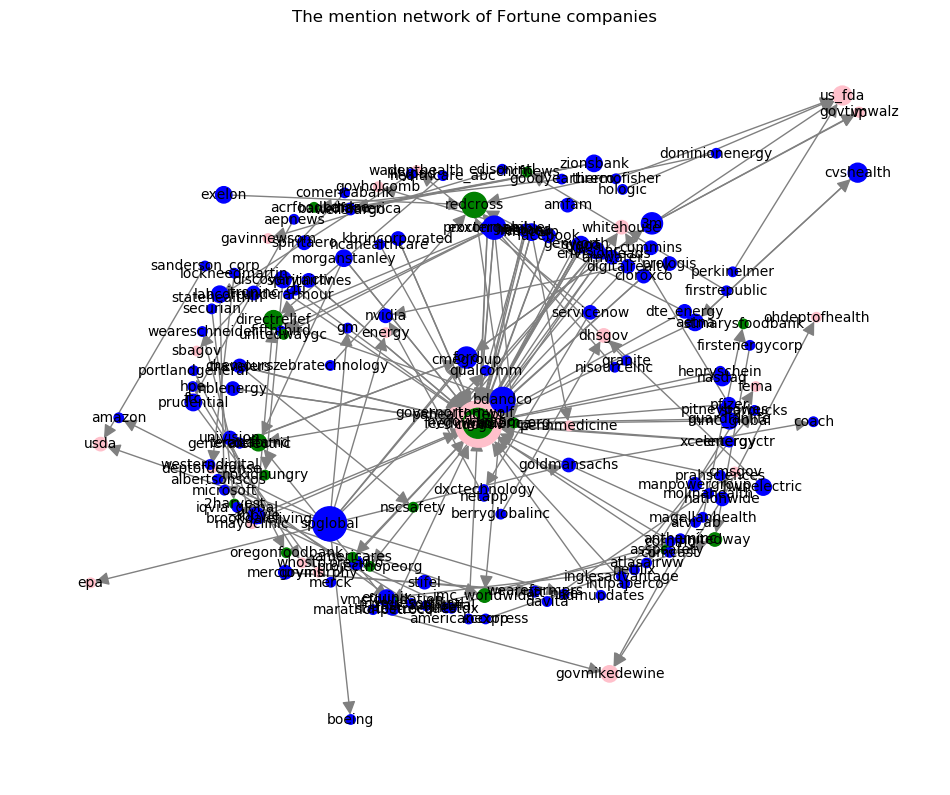

In [15]:
# Take a look
figure(figsize=(12, 10), dpi=100)

# node size proportional to degree
node_size= [x * 8000 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.kamada_kawai_layout(G)

# edge color
edge_color="grey"

# make arrows more obvious
arrowsize=20

# make a list of colors 
color=[cov.loc[cov.screen_name==i, "type"].iloc[0] for i in G.nodes]
replacements = {
    "business": "blue",
    "ngo": "green",
    "gov": "pink",
}
node_color = [replacements.get(x, x) for x in color]


nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=True,
                                 font_size=10)
plt.title('The mention network of Fortune companies')
plt.axis("off") 
plt.show()

# What differences can you see between the retweet and mention networks?

In [16]:
x=nx.in_degree_centrality(G)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

{'who': 0.13872832369942195,
 'cdcgov': 0.11560693641618497,
 'feedingamerica': 0.057803468208092484,
 'redcross': 0.04046242774566474,
 'us_fda': 0.023121387283236993,
 'directrelief': 0.023121387283236993,
 'ford': 0.023121387283236993,
 'cdcfound': 0.017341040462427744,
 'govmikedewine': 0.017341040462427744,
 'dhsgov': 0.011560693641618497,
 'cvshealth': 0.011560693641618497,
 'whitehouse': 0.011560693641618497,
 'nvidia': 0.011560693641618497,
 'usda': 0.011560693641618497,
 'imc_worldwide': 0.011560693641618497,
 'nygovcuomo': 0.011560693641618497,
 'unitedway': 0.011560693641618497,
 'mmc_global': 0.005780346820809248,
 'hwnelectric': 0.005780346820809248,
 'aetna': 0.005780346820809248,
 'nasdaq': 0.005780346820809248,
 '3m': 0.005780346820809248,
 'vp': 0.005780346820809248,
 'govtimwalz': 0.005780346820809248,
 'prologis': 0.005780346820809248,
 'spglobal': 0.005780346820809248,
 'qualcomm': 0.005780346820809248,
 'cummins': 0.005780346820809248,
 'chcfnews': 0.00578034682080

In [17]:
# Which organization has the largest indegree centrality in the mention network?
x=nx.in_degree_centrality(G)

cent=pd.DataFrame(x.items(),columns=['screen_name', 'indegree']) 
cent=pd.merge(cent, cov, on='screen_name',how="left")
len(cent)

# can test with a simple regression
import statsmodels.formula.api as smf
model = smf.ols(formula = 'indegree ~  C(type)+C(state)', \
                   data = cent).fit();
model.summary()

174

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               indegree   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9850
Date:                Sun, 05 Feb 2023   Prob (F-statistic):              0.503
Time:                        13:00:17   Log-Likelihood:                 507.52
No. Observations:                 174   AIC:                            -939.0
Df Residuals:                     136   BIC:                            -819.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0014      0.011     -0.132      0.895      -0.023       0.020
C(type)[T.gov]           0.0058      0.005      1.164      0.247      -0.004       0.016
C(type)[T.ngo]           0.0086      0.004      1.969      0.051   -3.81e-05       0.017
C(state)[T.CA]           0.0036      0.011      0.325      0.746      -0.018       0.025
C(state)[T.CO]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.CT]           0.0036      0.013      0.279      0.780      -0.022       0.029
C(state)[T.DC]           0.0159      0.015      1.064      0.289      -0.014       0.046
C(state)[T.DE]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.FL]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.GA]           0.0102      0.018      0.556      0.579      -0.026       0.046
C(state)[T.HI]           0.0072      0.018      0.394      0.694      -0.029       0.043
C(state)[T.ID]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.IL]           0.0082      0.012      0.705      0.482      -0.015       0.031
C(state)[T.IN]           0.0030      0.012      0.251      0.802      -0.021       0.027
C(state)[T.KS]           0.0072      0.018      0.394      0.694      -0.029       0.043
C(state)[T.KY]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.LA]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.MA]           0.0014      0.013      0.112      0.911      -0.023       0.026
C(state)[T.MD]           0.0033      0.014      0.244      0.808      -0.024       0.030
C(state)[T.MI]           0.0110      0.014      0.806      0.421      -0.016       0.038
C(state)[T.MN]           0.0020      0.012      0.159      0.874      -0.023       0.027
C(state)[T.MO]           0.0072      0.018      0.394      0.694      -0.029       0.043
C(state)[T.MS]           0.0014      0.018      0.077      0.939      -0.035       0.038
C(state)[T.NC]           0.0037      0.013      0.296      0.768      -0.021       0.029
C(state)[T.NJ]           0.0033      0.012      0.270      0.787      -0.021       0.028
C(state)[T.NV]           0.0072      0.018      0.394      0.694      -0.029       0.043
C(state)[T.NY]           0.0041      0.011      0.369      0.712      -0.018       0.026
C(state)[T.OH]           0.0021      0.011      0.188      0.851      -0.020       0.025
C(state)[T.OR]           0.0024      0.014      0.177      0.860      -0.024       0.029
C(state)[T.PA]           0.0014      0.012      0.112      0.911      -0.023       0.026
C(state)[T.RI]           0.0130      0.018      0.710      0.479      -0.023       0.049
C(state)[T.TN]           0.0014      0.013      0.108    

### 2.2. Convert tweets into semantic network<br>
* What is semantic network?
    - Nodes: words
    - Ties: cooccurrence in texts
* Why use semantic network?
    - Used to understand the themes/meanings, relationships and structures of texts/verbal communication.
    - Theories about cognitive processes such as the construction of meaning, mental models, and knowledge representation are the theoretical foundation of semantic network analysis. Assumes structures of meanings represents the collective cognitive structure among the creators of the text.
    - Semantic network analysis also reveals meaning by the relationships among the concepts rather than by counting the presence of words or concepts.
* Let's use non-retweets/non-mention tweets to build a semantic network. 



In [80]:
original_df=df[df.retweet!="retweet"]
def clean_tweet(x):
    clean=' '.join(re.sub("(@([A-Za-z0-9._-]+))|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
    clean = re.sub(r'\d+', '', clean)
    return clean
original_df["cleaned_tweet"]=original_df["text"].apply(clean_tweet)
original_df["cleaned_tweet"][0]

'How will the coronavirus impact business and why should businesses invest in pandemic resilience by Richard Smith Bingham and Kavitha Hariharan of via health covid'

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), min_df=5,stop_words="english", max_features=200) # default unigram model
X = vectorizer.fit_transform(original_df["cleaned_tweet"])
X
#vectorizer.vocabulary_
feature_names = vectorizer.get_feature_names()
feature_names


<4538x200 sparse matrix of type '<class 'numpy.int64'>'
	with 30877 stored elements in Compressed Sparse Row format>

['access',
 'additional',
 'address',
 'amid',
 'amp',
 'apologize',
 'assistance',
 'associates',
 'available',
 'avoid',
 'best',
 'business',
 'businesses',
 'care',
 'cdc',
 'center',
 'centers',
 'ceo',
 'check',
 'chief',
 'clients',
 'closely',
 'committed',
 'communities',
 'community',
 'companies',
 'concerns',
 'contact',
 'continue',
 'continues',
 'coronavirus',
 'covid',
 'credit',
 'crisis',
 'critical',
 'current',
 'currently',
 'customer',
 'customers',
 'day',
 'del',
 'demand',
 'details',
 'discuss',
 'dm',
 'doing',
 'don',
 'economic',
 'economy',
 'efforts',
 'el',
 'electric',
 'emergency',
 'employees',
 'en',
 'energy',
 'ensure',
 'essential',
 'experiencing',
 'face',
 'families',
 'feel',
 'fef',
 'fight',
 'financial',
 'follow',
 'following',
 'food',
 'free',
 'global',
 'guests',
 'guidance',
 'guidelines',
 'hard',
 'health',
 'healthcare',
 'healthy',
 'hear',
 'hello',
 'help',
 'helping',
 'hi',
 'high',
 'home',
 'immediate',
 'impact',
 'impacted

In [155]:
# get the feature to feature co-occurrence matrix
co = (X.T * X) # this is co-occurrence matrix in sparse csr format
co.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(co.todense()) # print out matrix in dense format

# select a threshold to reduce the density of the network
threshold=5
co_matrix = np.where(co.todense()>threshold, 1, 0)
print(co_matrix)

[[ 0  4  1 ...  1 49  2]
 [ 4  0  1 ...  1 18  0]
 [ 1  1  0 ...  3  7  1]
 ...
 [ 1  1  3 ...  0  7  4]
 [49 18  7 ...  7  0 12]
 [ 2  0  1 ...  4 12  0]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [158]:
# Build a network out of this co-occurrence matrix

G = nx.from_numpy_matrix(co_matrix, create_using=nx.Graph()) # creating from adjacency matrix 
node_name = dict(zip(range(0,len(list(G.nodes()))),feature_names))  
G = nx.relabel_nodes(G, node_name) 


In [159]:
[x for x in nx.degree_centrality(G).values()]

[0.16080402010050251,
 0.2613065326633166,
 0.1457286432160804,
 0.07537688442211056,
 0.8592964824120604,
 0.25125628140703515,
 0.2814070351758794,
 0.2663316582914573,
 0.2613065326633166,
 0.12060301507537688,
 0.1457286432160804,
 0.3417085427135678,
 0.20100502512562815,
 0.35175879396984927,
 0.4623115577889447,
 0.12060301507537688,
 0.16080402010050251,
 0.30150753768844224,
 0.1658291457286432,
 0.09547738693467336,
 0.11055276381909548,
 0.2663316582914573,
 0.3869346733668342,
 0.5125628140703518,
 0.22110552763819097,
 0.07035175879396985,
 0.2814070351758794,
 0.2663316582914573,
 0.4271356783919598,
 0.23618090452261306,
 1.0,
 1.0,
 0.10050251256281408,
 0.30150753768844224,
 0.22613065326633167,
 0.1306532663316583,
 0.12060301507537688,
 0.135678391959799,
 0.7839195979899498,
 0.10552763819095477,
 0.05025125628140704,
 0.135678391959799,
 0.08040201005025126,
 0.16080402010050251,
 0.22110552763819097,
 0.24623115577889448,
 0.11055276381909548,
 0.12060301507537688

<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'The semantic network of Fortune companies discourse on COVID19')

(-0.8535689700342235,
 1.0906607937359127,
 -0.7365161202032429,
 0.8909519064576916)

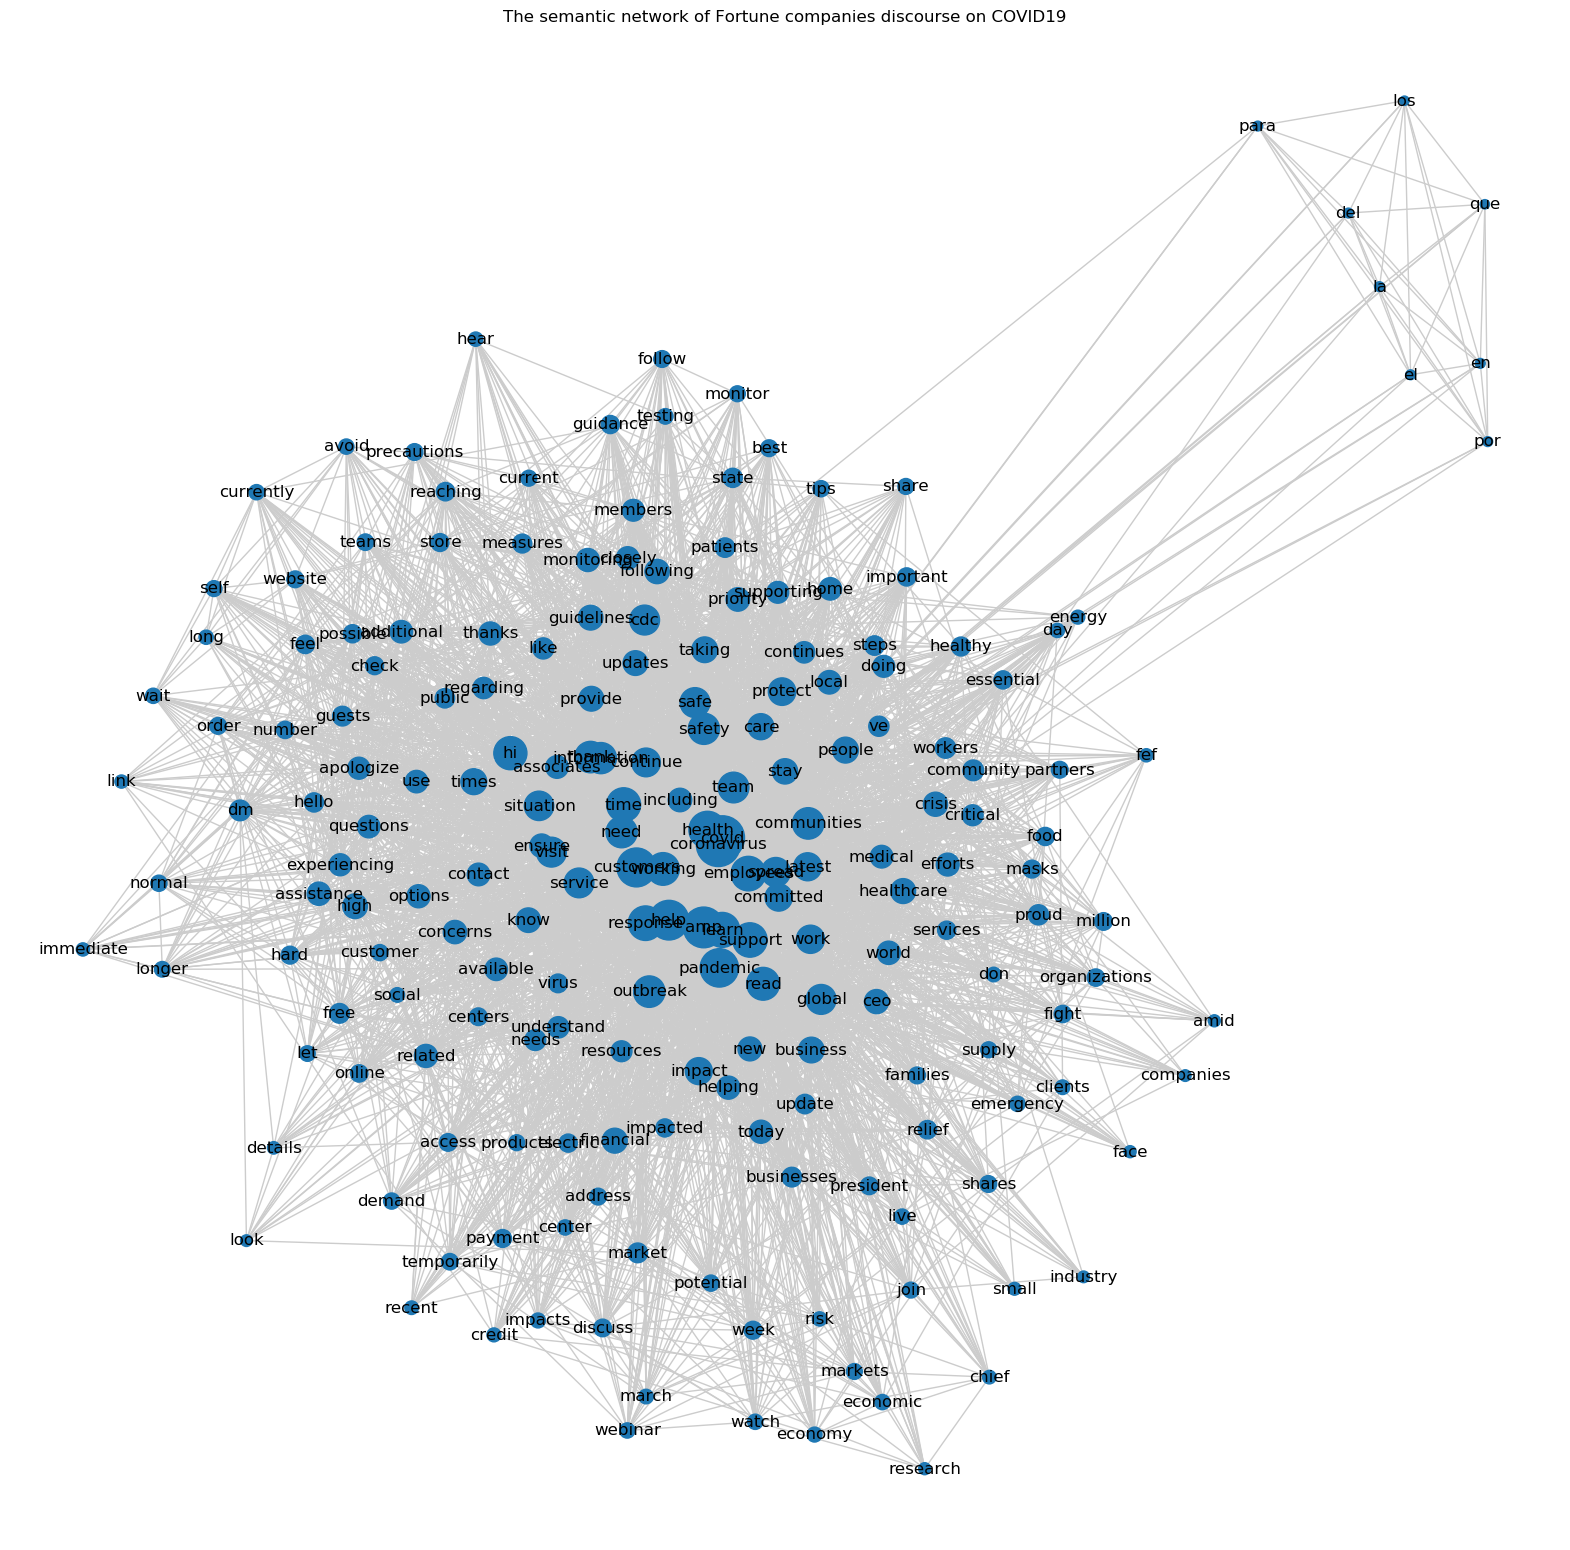

In [161]:
# Take a look
figure(figsize=(20,20), dpi=100)

# node size proportional to degree
node_size= [x*1000 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.spring_layout(G)

# edge color
edge_color='0.8'

nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  edge_color=edge_color,
                                  with_labels=True,
                                 font_size=12)
plt.title('The semantic network of Fortune companies discourse on COVID19')
plt.axis("off") 
plt.show()
